In [1]:
# Translate "PlotAnalyticalModel2Curves_v1.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
Vmax = 0.83;           # Maximum gliding speed (um/s) # Scharrel et al., Biophy, 2014
k = 100.0;          # Spring constant (pN/um)
fstall = -5;      # Stall force (pN)
frupt = -7;       # Rupture force (pN)
Tau1 = 0.2;       # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.

$fv = f_{stall}\times (1 - \frac{V}{V_{max}})$ <br>

$(\frac{1}{R} - 1)\times 0.5\times f_{rupt}\times \frac{\frac{f_{rupt}}{k\times \tau_1}}{(\frac{f_{rupt}}{k\times \tau_1} - V)}$

In [66]:
# Values of active motor ratio investigated
##ActiveMotorRatio = np.array([0.8, 0.853721, 0.9, 0.95]);

##ActiveMotorRatio = np.arange(0.35,0.42,0.01); # critical = 0.37 from v2

ActiveMotorRatio = np.array([0.34, 0.37, 0.40, 0.43]);

#ActiveMotorRatio = np.array([0.6, 0.7, 0.8, 0.9]);

# Gliding speed
Vf = np.arange(-0.1,Vmax,0.02); # 0.1 is sparse
V = np.arange(0.0,Vmax,0.02); 

# f-V relation
fV = fstall*(1.0 - (V/Vmax)) 

# fV = []
# for vel in range(len(Vf)):
#     if Vf[vel]>0:
#         fV.append( fstall*(1.0 - (Vf[vel]/Vmax)) )
#     elif Vf[vel]<0:
#         fV.append( 0 )

# V-fimp relation
fFric = []

In [67]:
for I in range(len(ActiveMotorRatio)):
    fFric.append( (1/ActiveMotorRatio[I] - 1.0)*0.5*frupt*frupt/k/Tau1/(frupt/k/Tau1 - V) )

In [68]:
len(ActiveMotorRatio)

4

In [69]:
len(fFric)

4

In [70]:
len(fFric[2])

42

In [71]:
len(fV)

42

In [72]:
len(Vf)

47

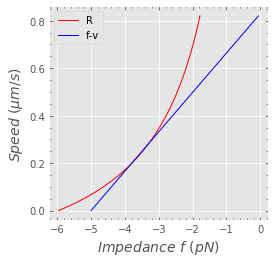

In [74]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[1],V,'r-', lw=1, label='R') # impedance 
ax.plot(fV,V,'b-',lw=1, label='f-v')

#ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14); ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-no-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

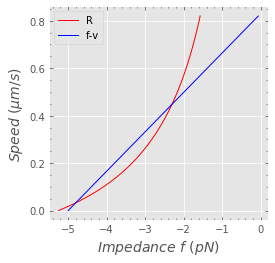

In [75]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[2],V,'r-', lw=1, label='R')
ax.plot(fV,V,'b-',lw=1, label='f-v')

#ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14); ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-1-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

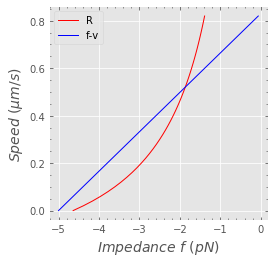

In [76]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[3],V,'r-', lw=1, label='R')
ax.plot(fV,V,'b-',lw=1, label='f-v')

#ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14); ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-2-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

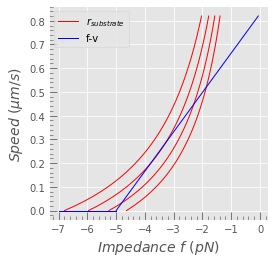

In [101]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

for I in range(len(ActiveMotorRatio)):
    if I==0:
        ax.plot(fFric[I],V,'r-', lw=1, label='$r_{substrate}$')
    else:
        ax.plot(fFric[I],V,'r-', lw=1)
ax.plot(fV,V,'b-',lw=1, label='f-v')

ax.plot([-7,-5],[0,0],'b-',lw=1)

ax.set_xticks(np.arange(-7,1,1))
ax.set_yticks(np.arange(0.0,0.9,0.1))
#ax.set_xlim(-7,-0.1)
#ax.axhline(y=0, color='k', lw=1)
#ax.axvline(x=0, color='k', lw=1)

ax.minorticks_on()
ax.tick_params(direction='in', length=8, which = 'major')
ax.tick_params(direction='in', length=4, which = 'minor')

ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14)
ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')
#plt.savefig('fig/analy-all-sol.pdf', format='pdf', bbox_inches='tight')

# plt.savefig('fig/analy-all-sol_MT.svg', format='svg', bbox_inches='tight')
# plt.savefig('fig/analy-all-sol_MT.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [92]:
fV

array([-5.        , -4.87951807, -4.75903614, -4.63855422, -4.51807229,
       -4.39759036, -4.27710843, -4.15662651, -4.03614458, -3.91566265,
       -3.79518072, -3.6746988 , -3.55421687, -3.43373494, -3.31325301,
       -3.19277108, -3.07228916, -2.95180723, -2.8313253 , -2.71084337,
       -2.59036145, -2.46987952, -2.34939759, -2.22891566, -2.10843373,
       -1.98795181, -1.86746988, -1.74698795, -1.62650602, -1.5060241 ,
       -1.38554217, -1.26506024, -1.14457831, -1.02409639, -0.90361446,
       -0.78313253, -0.6626506 , -0.54216867, -0.42168675, -0.30120482,
       -0.18072289, -0.06024096])

In [102]:
import subprocess
subprocess.call('inkscape fig/analy-all-sol_MT.svg -M fig/analy-all-sol_MT.emf', shell=True)

0

In [90]:
mt_fv = pd.DataFrame({'f0':fFric[0], 'f1':fFric[1], 'f2':fFric[2], 'f3':fFric[3], 'v':V})
mt_fv.to_csv('mt_fv.csv', index=False)